In [294]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px

In [295]:
df=pd.read_csv('movies.csv')
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Drop & Add & Modify some columns

In [297]:
df.drop(['id','imdb_id','homepage','cast','tagline','overview','budget_adj'],axis=1,inplace= True )

In [298]:
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
revenue_adj                0
dtype: int64

In [299]:
df.dropna(axis=0, how='any',  subset=['genres','director'], inplace=True)



In [300]:
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
director                   0
keywords                1449
runtime                    0
genres                     0
production_companies     994
release_date               0
vote_count                 0
vote_average               0
release_year               0
revenue_adj                0
dtype: int64

In [301]:
df['keywords']=df['keywords'].fillna(0)
df['production_companies']=df['production_companies'].fillna(0)

In [302]:
df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
revenue_adj             0
dtype: int64

In [303]:
df.popularity.round(2)

0        32.99
1        28.42
2        13.11
3        11.17
4         9.34
         ...  
10861     0.08
10862     0.07
10863     0.07
10864     0.06
10865     0.04
Name: popularity, Length: 10801, dtype: float64

In [304]:
df.popularity=df.popularity.round(2)

In [305]:
df.insert(3,'Profit',df.revenue-df.budget)

In [306]:
df.insert(4,'Roi',df.Profit/df.budget)

In [307]:
df.Roi=df.Roi.round(2)

In [308]:
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
Profit                     0
Roi                     4641
original_title             0
director                   0
keywords                   0
runtime                    0
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
revenue_adj                0
dtype: int64

In [309]:
infit=np.isfinite(df.Roi)

In [310]:
df.Roi.value_counts()

Roi
-1.00     1350
 inf       995
-0.99       29
-0.98       27
-0.38       21
          ... 
 4.15        1
 24.90       1
 2.32        1
 6.24        1
 6.62        1
Name: count, Length: 1075, dtype: int64

In [311]:
infit=~np.isfinite(df.Roi)

In [312]:
infit.sum()

5636

In [313]:
df['Roi']=df['Roi'].replace([np.inf,-np.inf],np.nan)

In [314]:
df.Roi.value_counts()

Roi
-1.00     1350
-0.99       29
-0.98       27
-0.38       21
 0.20       19
          ... 
 4.15        1
 24.90       1
 2.32        1
 6.24        1
 6.62        1
Name: count, Length: 1074, dtype: int64

In [315]:
df1=df.groupby('release_year')['Roi'].mean()
df1

release_year
1960        5.423333
1961        5.911538
1962        4.529286
1963        2.926364
1964        5.500000
1965        3.242727
1966        0.178333
1967        8.481667
1968        1.616000
1969        3.130000
1970        8.112143
1971        6.293913
1972       35.256471
1973       21.225556
1974       23.580952
1975       17.217143
1976       13.286471
1977       40.420741
1978       16.149630
1979       15.343750
1980        7.311290
1981        6.065238
1982        6.586000
1983        2.836250
1984        3.940556
1985     1071.336364
1986    16979.924833
1987        3.779286
1988        2.010597
1989        3.474091
1990        3.123607
1991        1.661639
1992        2.792923
1993        2.004270
1994        3.436588
1995        2.069362
1996        1.154622
1997        2.010862
1998        1.458091
1999       68.272081
2000        0.850833
2001        1.267902
2002        1.750060
2003        1.456536
2004        7.280929
2005        1.859034
2006        1.584882


In [316]:
df

,popularity,budget,revenue,Profit,Roi,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
1,28.42,150000000,378436354,228436354,1.52,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,3.481613e+08
2,13.11,110000000,295238201,185238201,1.68,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,2.716190e+08
3,11.17,200000000,2068178225,1868178225,9.34,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.902723e+09
4,9.34,190000000,1506249360,1316249360,6.93,Furious 7,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.08,0,0,0,NaN,The Endless Summer,Bruce Brown,surfer|surfboard|surfing,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00
10862,0.07,0,0,0,NaN,Grand Prix,John Frankenheimer,car race|racing|formula 1,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00
10863,0.07,0,0,0,NaN,Beregis Avtomobilya,Eldar Ryazanov,car|trolley|stealing car,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00
10864,0.06,0,0,0,NaN,"What's Up, Tiger Lily?",Woody Allen,spoof,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00


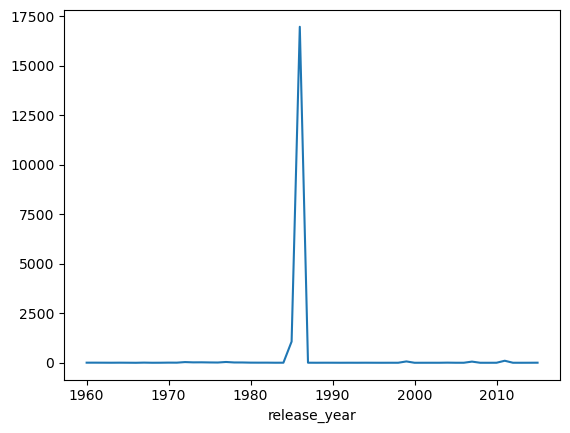

In [317]:
df1.plot(kind='line')
plt.show()

### histogram 

In [319]:
df2=df[['popularity','budget','revenue','Profit','Roi','vote_average','release_year']]

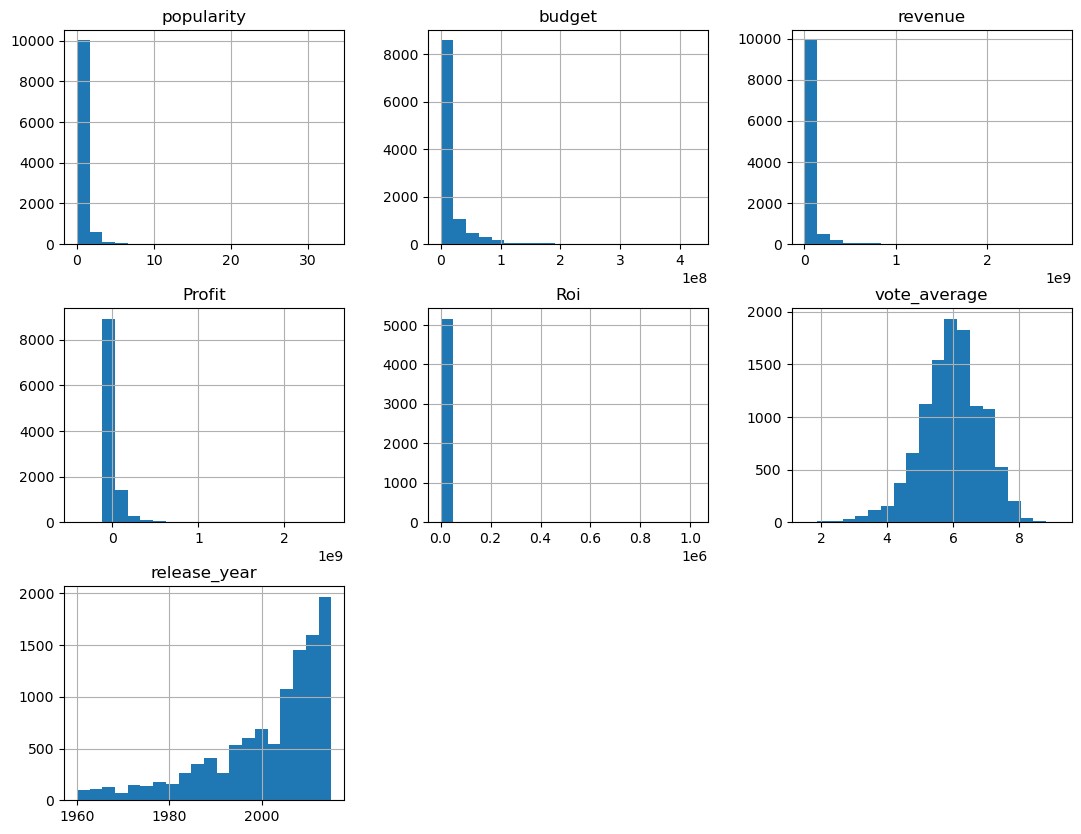

In [320]:
df2.hist(bins=20,figsize=(13,10)) 
plt.show()

### Line Graph 

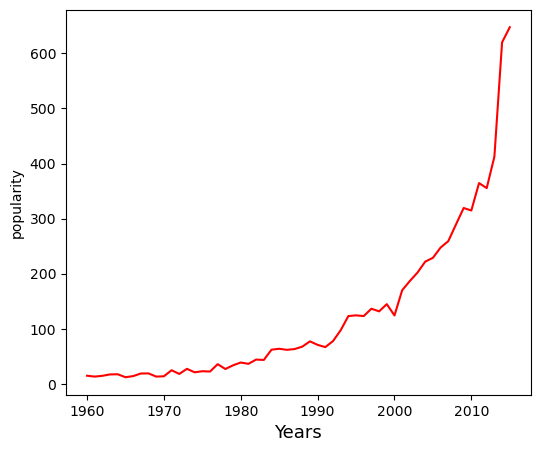

In [322]:
df3=df.groupby('release_year')['popularity'].sum()
plt.figure(figsize=(6,5))
df3.plot(kind='line',color='red')
plt.xlabel('Years',fontsize=13)
plt.ylabel('popularity')
plt.show()

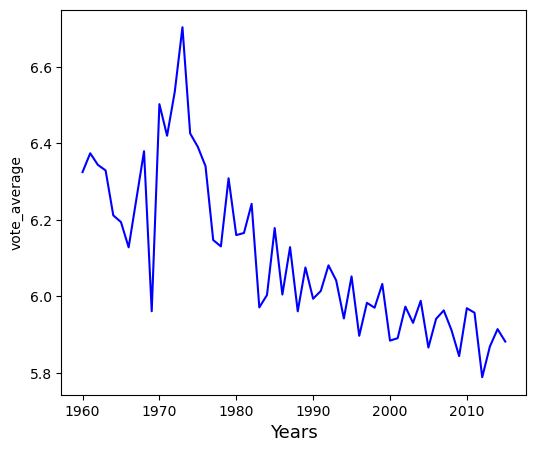

In [323]:
df4=df.groupby('release_year')['vote_average'].mean()
plt.figure(figsize=(6,5))
df4.plot(kind='line',color='blue')
plt.xlabel('Years',fontsize=13)
plt.ylabel('vote_average')
plt.show()

### Popularity Vs Vote Average

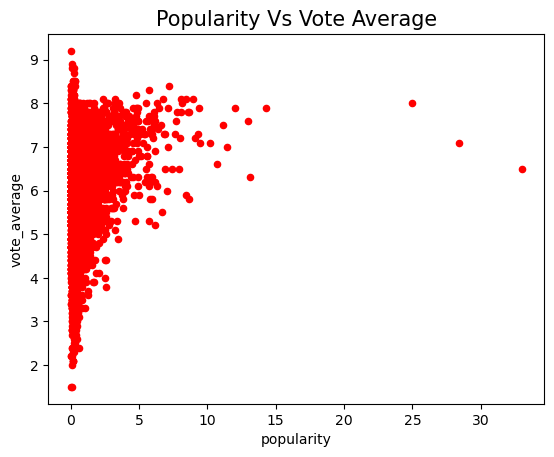

In [325]:
df5=df.plot(kind='scatter',x='popularity', y='vote_average',color='red')
plt.title('Popularity Vs Vote Average', fontsize=15)
plt.show()

#### Modify Genres Column

In [327]:
list=['genres']
for i in list:
    df[i]=df[i].apply(lambda x:x.split('|'))

In [328]:
df=df.explode('genres')

In [329]:
df.genres.value_counts()

genres
Drama              4755
Comedy             3782
Thriller           2905
Action             2379
Romance            1708
Horror             1636
Adventure          1466
Crime              1354
Science Fiction    1224
Family             1223
Fantasy             912
Mystery             809
Animation           692
Documentary         509
Music               402
History             332
War                 270
Foreign             185
Western             164
TV Movie            162
Name: count, dtype: int64

###  Movie genres are more popular

In [331]:
df6=df.groupby('genres')['popularity'].sum().sort_values(ascending=True)
df6

genres
Foreign              35.24
TV Movie             44.03
Documentary          93.13
Western              97.42
History             192.35
War                 196.48
Music               198.15
Mystery             558.55
Animation           594.46
Horror              761.39
Fantasy             908.87
Family              967.06
Crime              1009.07
Romance            1013.21
Science Fiction    1230.41
Adventure          1697.11
Thriller           2155.90
Action             2208.08
Comedy             2246.25
Drama              2815.43
Name: popularity, dtype: float64

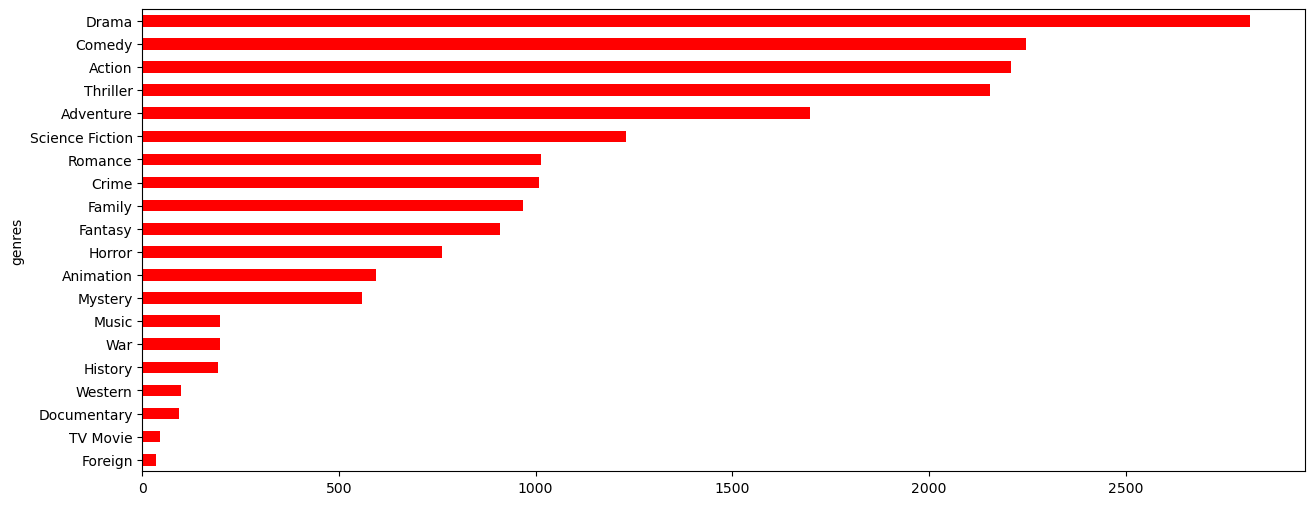

In [332]:
df6.plot(kind='barh',x='genres',y='popularity',color='red',figsize=(15,6))
plt.show()

### Add & Modify column

In [334]:
df['release_date']=pd.to_datetime(df['release_date'])

C:\Users\HP 840 G2\AppData\Local\Temp\ipykernel_17320\642638228.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [335]:
df.head(1)

,popularity,budget,revenue,Profit,Roi,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.392446e+09


In [336]:
df['Month'] =df['release_date'].dt.month

### Bar Graph

In [338]:
df7=df.groupby('Month')['popularity'].sum()

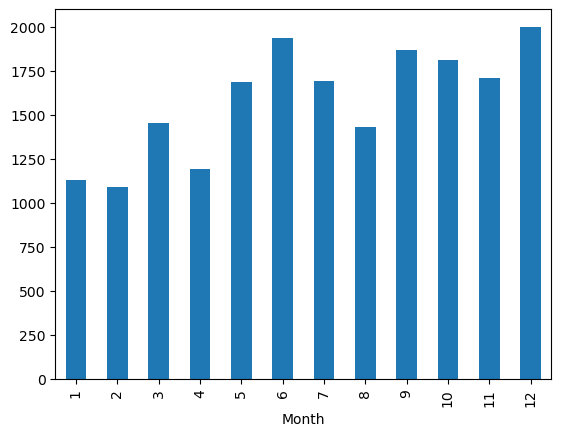

In [339]:
df7.plot(kind='bar')
plt.show()

In [340]:
mon_name={
    1:'Jan', 
    2:'Feb',
    3:'Mar', 
    4:'Apr',
    5:'May', 
    6:'Jun',
    7:'Jul', 
    8:'Aug',
    9:'Sep', 
    10:'Oct',
    11:'Nov', 
    12:'Dec',
    }

In [341]:
df7

Month
1     1131.78
2     1092.93
3     1458.32
4     1191.81
5     1687.53
6     1936.84
7     1694.03
8     1432.59
9     1872.28
10    1811.91
11    1710.35
12    2002.22
Name: popularity, dtype: float64

In [342]:
data={
    'Months':df7.index, 
    'Popularity':df7.values
}
df7=pd.DataFrame(data)

In [343]:
df7

,Months,Popularity
0,1,1131.78
1,2,1092.93
2,3,1458.32
3,4,1191.81
4,5,1687.53
5,6,1936.84
6,7,1694.03
7,8,1432.59
8,9,1872.28
9,10,1811.91


In [344]:
df7['Months']=df7['Months'].map(mon_name)

In [345]:
df7

,Months,Popularity
0,Jan,1131.78
1,Feb,1092.93
2,Mar,1458.32
3,Apr,1191.81
4,May,1687.53
5,Jun,1936.84
6,Jul,1694.03
7,Aug,1432.59
8,Sep,1872.28
9,Oct,1811.91


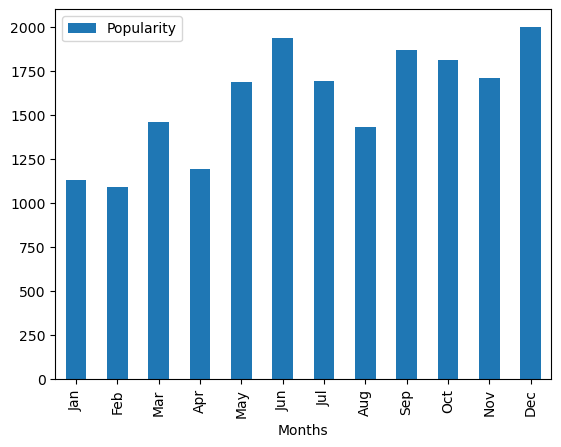

In [346]:
df7.plot(kind='bar',x='Months',y='Popularity')
plt.show()

### Revenue by Month

In [348]:
df8 =df.groupby('Month')['revenue'].sum()

In [349]:
df8

Month
1      35873456579
2      54352852344
3      93669046441
4      77813179749
5     151475532493
6     193681776686
7     141947570995
8      71642408883
9      70379641581
10     84054172048
11    139176268899
12    164738399960
Name: revenue, dtype: int64

In [350]:
mon_name={
    1:'Jan', 
    2:'Feb',
    3:'Mar', 
    4:'Apr',
    5:'May', 
    6:'Jun',
    7:'Jul', 
    8:'Aug',
    9:'Sep', 
    10:'Oct',
    11:'Nov', 
    12:'Dec',
    }

In [351]:

df['Month']=df['Month'].replace(mon_name)

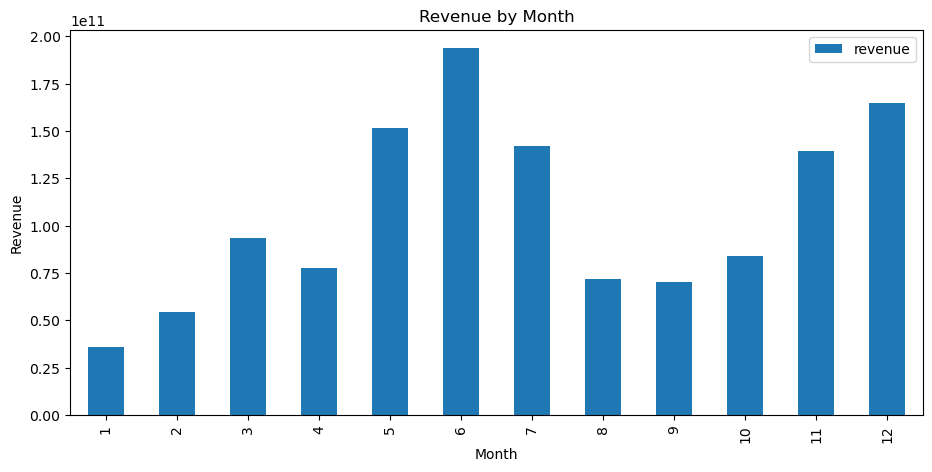

In [352]:
plt.figure(figsize=(11,5))
df8.plot(kind='bar',x='Month',y='revenue',legend=True)
plt.title('Revenue by Month')
plt.ylabel('Revenue')
plt.show()

### The Movies with the Highest Profit


In [354]:
df9=df.groupby('original_title')['Profit'].sum().sort_values(ascending=False).head(5)
df9

original_title
Avatar                          10178023388
Star Wars: The Force Awakens     7472712900
Jurassic World                   5454115240
The Net                          5421398290
Titanic                          4896102564
Name: Profit, dtype: int64

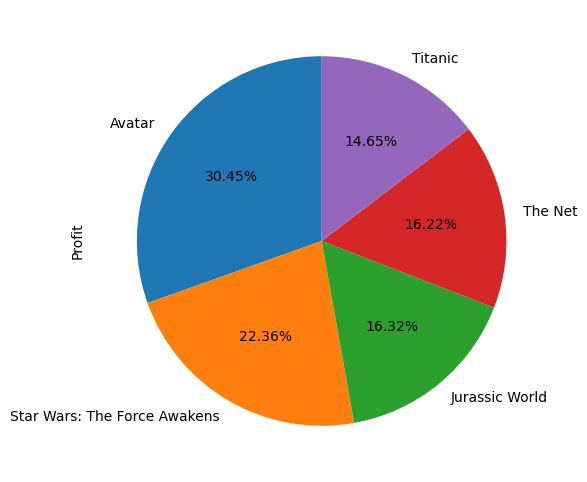

In [355]:
plt.figure(figsize=(13,6))
df9.plot(kind='pie',x='original_title', autopct='%1.2f%%',startangle=90)
plt.show()

### Production Companies with the Most Films


In [357]:
df10=df.production_companies.value_counts().head(6)

In [358]:
df10

production_companies
0                       2152
Paramount Pictures       404
Universal Pictures       352
Walt Disney Pictures     236
Warner Bros.             225
Columbia Pictures        207
Name: count, dtype: int64

In [359]:
df11 = df10.iloc[1:6]

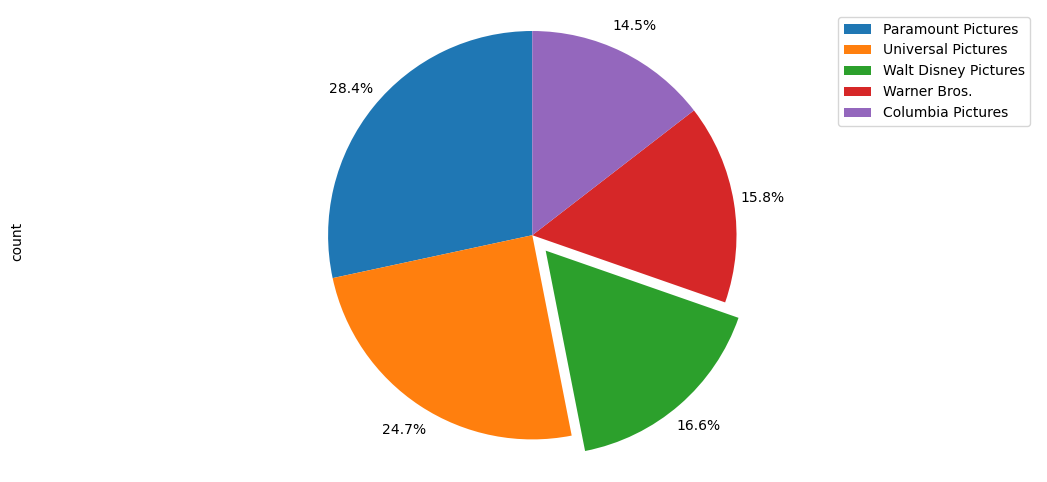

In [360]:
list=[0,0,0.1,0,0]
df11.plot(kind='pie',autopct='%1.1f%%',figsize=(13,6),startangle=90, labels=None,pctdistance=1.14,explode=list)
#plt.tilte('Top 5 Movies By Profit',color='red')
plt.legend(labels=df11.index , loc='upper right')
plt.axis('equal')
plt.show()

### treemap

In [362]:
df12=df.keywords.value_counts()

In [363]:
df13=df12.iloc[1:16]

In [364]:
df13

keywords
woman director                     238
independent film                   177
suspense                            68
musical                             57
sport                               50
duringcreditsstinger                49
holiday                             38
biography                           26
dystopia                            26
independent film|woman director     23
holiday|christmas                   23
sequel                              19
based on novel                      18
christmas                           18
cop|new england|jesse stone         17
Name: count, dtype: int64

In [365]:
data ={
    'Keywords':df13.index, 
    'Count':df13.values
}
df13=pd.DataFrame(data)

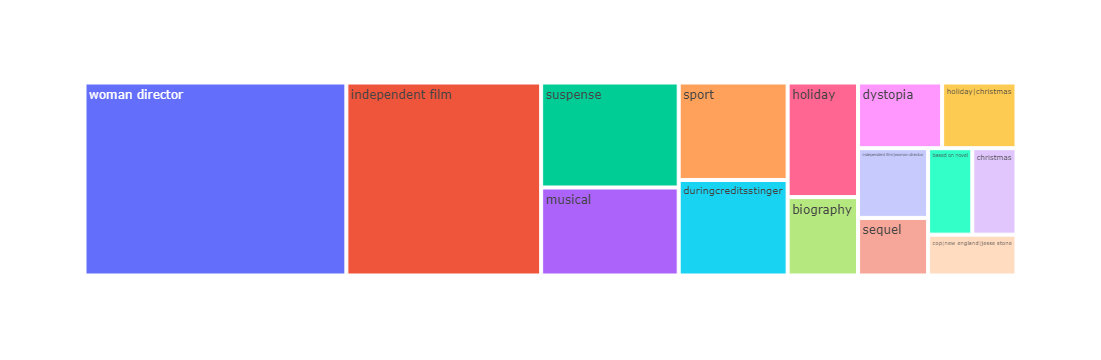

In [367]:
fig=px.treemap(df13,path=['Keywords'],values='Count',)
fig.show()